## Names of group members (max 3):
    
    Kevin Vonk, s1706896



## $$\mbox{Logistic Regression.}$$


In [1]:
# %load ../../standard_import.txt
import copy
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

from IPython.display import display, Math, Latex

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def split_data(data):
    x0, y0 = np.hsplit(data[data[:,2] == 0, :2], 2)
    x1, y1 = np.hsplit(data[data[:,2] == 1, :2], 2)

    return x0, y0, x1, y1

In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    ## the data gives the grades for two exams; 
    ## the last entry in the data is a 0 or 1: 
    ##   rejected or accepted for a certain programme
    ## make a scatter plot of the data such that 
    ## a 1 gets a black plus, the 0 a yellow (not too) large dot
    if axes == None:
        axes = plt.gca()

    x0, y0, x1, y1 = split_data(data)

    axes.plot(x0, y0, 'y.', label=label_neg)
    axes.plot(x1, y1, 'b+', label=label_pos)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

### $$\mbox{Logistic regression.}$$

#### $$ \mbox{Logistic regression hypothesis:} \hspace{1cm} h_{\theta}(x) = \sigma(\theta^{T}x), ~~~ \sigma(z)=\frac{1}{1+e^{−z}} $$

In [5]:
sigmoid = lambda z: 1/(1 + np.exp(-z))

#### $$\mbox{Prediction.}$$

In [6]:
def predict(theta, X, threshold = 0.5):
    hypo = sigmoid(X @ theta)
    return hypo[hypo > threshold]

###  $$\mbox{Regularized logistic regression.}$$

In [7]:
data = loaddata('../data/ex2data2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [47]:
# We do not rescale the data here, since the feature set already lies within
# a good working range for the sigmoid function.

# Since X is only used for drawing, and the indexing is wrong in the provided plotting block,
# we'll ignore the bias here.
# X = np.c_[np.ones(data.shape[0]), data[:, 1], data[:, 2]]
X = np.c_[data[:, 1], data[:, 2]]
y = np.c_[data[:, 2]]

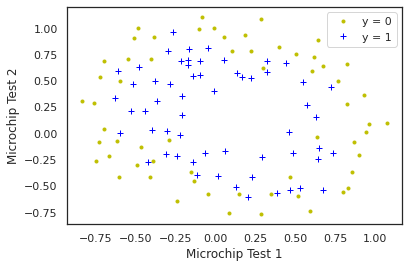

In [48]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

####   $$\mbox{Polynomials.}$$

In [49]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data[:,0:2])
XX.shape

(118, 28)

#### $$\mbox{Regularized Cost Function:}\hspace{1cm} J(\theta) = -\frac{1}{m}\big((\,\ln\,(\sigma(X\theta))^Ty+(\,\ln\,(1-\sigma(X\theta))^T(1-y)\big) + \frac{\lambda_{reg}}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [50]:
def costFunctionReg(theta, X, y, reg):
    m = y.size
    xt = X @ theta
    J = -1/m * (np.log(sigmoid(xt)).T @ y + np.log(1 - sigmoid(xt)).T @ (1 - y)) + reg/(2*m) * np.sum(theta[1:]**2)

    if np.isnan(J):
        return np.inf
    return float(J)


#### $$\mbox{Partial derivative:}\hspace{1cm}  \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(\sigma(X\theta)-y) + \frac{\lambda_{reg}}{m}\theta_{j}$$
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [51]:
IDENT_A = np.identity(XX.shape[1])
IDENT_A[0, 0] = 0
def gradientReg(theta, X, y, reg):
    m = y.size
    grad = 1/m * X.T @ (sigmoid(X @ theta) - y) + reg/m * IDENT_A @ theta
    return grad

In [52]:
initial_theta = np.c_[np.zeros(XX.shape[1])]
costFunctionReg(initial_theta, XX, y, 1)

0.693147180559945

In [53]:
def gradient_runner(theta, X, y, reg, alpha=0.001, MAX_ITER=1E4, TOL=1E-8):
    done = lambda prev, cur: np.abs(cur - prev) <= TOL
    iter = 0

    prevJ = 999
    J = 995

    while not done(prevJ, J) and iter <= MAX_ITER:
        prevJ = J
        theta -= alpha * gradientReg(theta, X, y, reg)
        J = costFunctionReg(theta, X, y, reg)

        yield iter, theta, J
        iter += 1


def gradientDescentReg(*args, **kwargs):
    for i, theta, J in gradient_runner(*args, **kwargs):
        pass

    return theta, J

initial cost:  0.693147180559945
final cost:  0.6282219132879251
theta =  [[ 0.1865181  -0.05551868  0.13013633 -0.36639939 -0.10055282 -0.21623034
  -0.09043063 -0.04916588 -0.05827387 -0.10891901 -0.29501233 -0.01468629
  -0.09678674 -0.02609496 -0.25521958 -0.12264484 -0.03217717 -0.02154687
  -0.04237472 -0.03582017 -0.18571722 -0.23040111 -0.00519119 -0.04918791
  -0.00162094 -0.05466872 -0.01143457 -0.25667602]]
initial cost:  0.693147180559945
final cost:  0.6865040524995385
theta =  [[ 0.00902854 -0.0172553   0.00598374 -0.05351558 -0.01306379 -0.03710459
  -0.01811414 -0.00754163 -0.00875747 -0.02217467 -0.04241735 -0.0023567
  -0.01378408 -0.00349146 -0.04038394 -0.02061094 -0.00461998 -0.00351833
  -0.0061824  -0.00493942 -0.03128965 -0.03344199 -0.00107523 -0.00686149
  -0.00039136 -0.00779855 -0.00155158 -0.04021437]]
initial cost:  0.693147180559945
final cost:  0.6237835515254744
theta =  [[ 0.19230548 -0.05645377  0.1370165  -0.38035731 -0.1047861  -0.22359618
  -0.0932

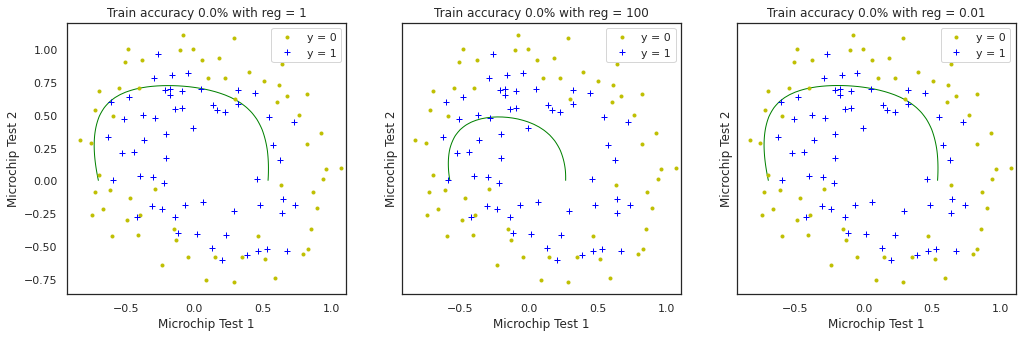

In [54]:
## we vary the value of the regulaization parameter, reg
i = 0
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))  
for reg in {100, 1, 0.01}:
    theta = copy.deepcopy(initial_theta)
    print('initial cost: ',costFunctionReg(theta, XX, y, reg))
    theta , J = gradientDescentReg(theta, XX, y, reg)
    print('final cost: ',costFunctionReg(theta, XX, y, reg))
    print('theta = ', theta.T)
    accuracy = 100*(sum(predict(theta, XX) == y))/y.size
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(np.dot(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]), theta))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g'); 
    axes.flatten()[i].set_title('Train accuracy {}% with reg = {}'.format(np.round(accuracy[0], decimals=2), reg))
    i = i + 1
 

In [56]:
## what is your comment on these results